# Regularization: 
It is a technique using which we prevent overfitting of our model in test dataset.
We introduce certain bias such that model is more generalised towards towawrds raw data and not memorizing training noise.

In [37]:
# from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

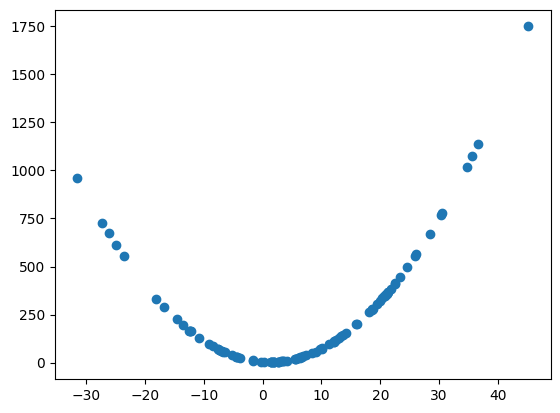

In [30]:
x = 17 * np.random.randn(100, 1) + 5
y = 0.9 * x**2 - 2*x + 3 + np.random.randn(100,1)

plt.tight_layout()
plt.scatter(x, y)
plt.show()

In [28]:
# x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=.2, shuffle=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, shuffle=True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(80, 1) (20, 1) (80, 1) (20, 1)


# Linear Regression

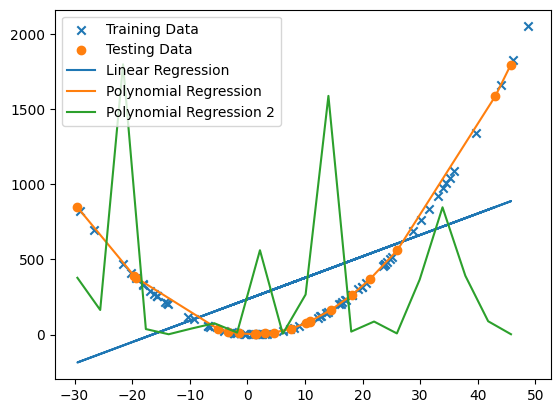

In [53]:
# Normal Linear Regresion
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

# Polynomial Regresion
poly_obj = PolynomialFeatures(degree=2)
x_train_trns = poly_obj.fit_transform(x_train)
x_test_trns = poly_obj.transform(x_test)
plr = LinearRegression()
plr.fit(x_train_trns, y_train)
y_pred_poly = plr.predict(x_test_trns)
y_pred_poly_train = plr.predict(x_train_trns)

plt.tight_layout()
plt.scatter(x_train[:, 0], y_train, label='Training Data', marker='x')
plt.scatter(x_test[:, 0], y_test, label='Testing Data', marker='o')
plt.plot(x_test, y_pred, label='Linear Regression') 
plt.plot(sorted(x_test[:,0]), y_pred_poly[np.argsort(x_test[:, 0])], label='Polynomial Regression') 

x_axis = np.linspace(x_test.min(), x_test.max(), 20)
plt.plot(x_axis, y_pred_poly, label='Polynomial Regression 2') 

plt.legend(loc='upper left')
plt.show()